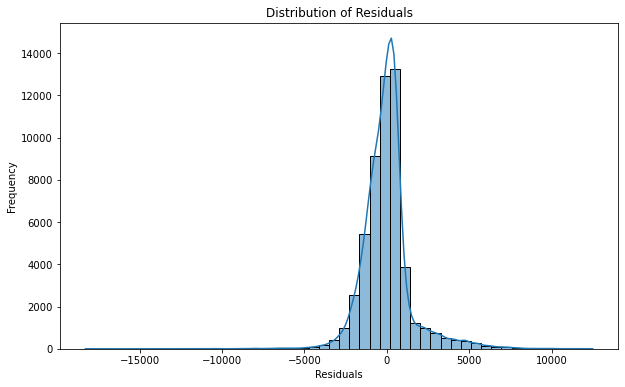

In [2]:
 #Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
# using Seaborn's "diamonds" dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds[["carat", "depth", "table"]]  # You can adjust the features
y = diamonds["price"]

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Predicting values
y_pred = model.predict(X)

# Calculating residuals
residuals = y - y_pred

# Visualizing the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [3]:
# Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
# Mean Squared Error (RMSE) for a linear regression model.

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds[["carat", "depth", "table"]]  # You can adjust features
y = diamonds["price"]

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Predicting values
y_pred = model.predict(X)

# Calculating evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Printing results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Squared Error (MSE): 2328790.80
Mean Absolute Error (MAE): 994.33
Root Mean Squared Error (RMSE): 1526.04


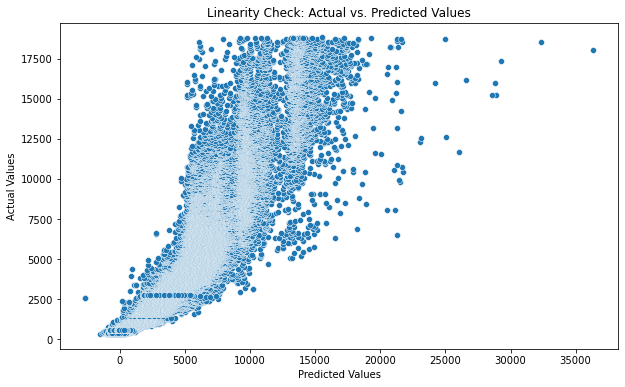

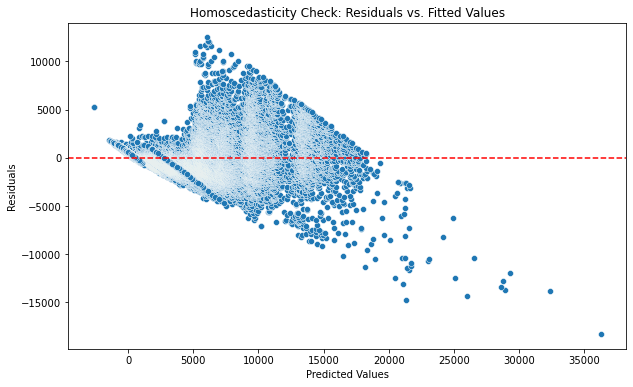

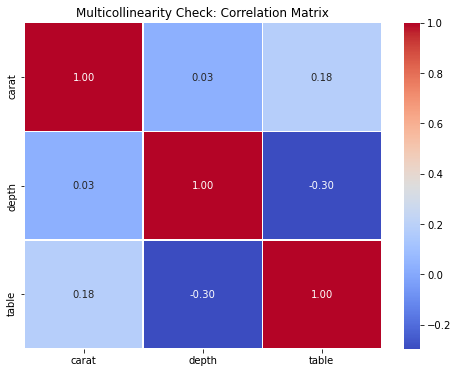

In [4]:
# Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
# linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds[["carat", "depth", "table"]]  # Adjust features as needed
y = diamonds["price"]

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
residuals = y - y_pred

# 1. Checking Linearity (Scatter plot of actual vs predicted values)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Linearity Check: Actual vs. Predicted Values")
plt.show()

# 2. Checking Homoscedasticity (Residuals plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs. Fitted Values")
plt.show()

# 3. Checking Multicollinearity (Correlation matrix)
corr_matrix = diamonds[["carat", "depth", "table"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Multicollinearity Check: Correlation Matrix")
plt.show()


Linear Regression: MSE = 2333883.18
Ridge Regression: MSE = 2333877.17
Lasso Regression: MSE = 2333873.19
Random Forest Regressor: MSE = 2039311.18


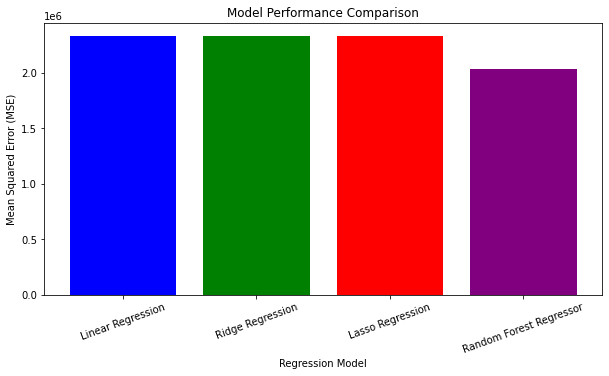

In [6]:
# Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
# performance of different regression models.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds").dropna()

# Selecting features and target variable
X = diamonds[["carat", "depth", "table"]]  # Adjust features as needed
y = diamonds["price"]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Loop through models and evaluate performance
results = {}

for name, model in models.items():
    # Creating a pipeline with feature scaling
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    results[name] = mse
    print(f"{name}: MSE = {mse:.2f}")

# Visualizing model performance
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Regression Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=20)
plt.show()


Intercept: -2261.91
Coefficient for 'carat': 7768.91
R-squared Score: 0.8489


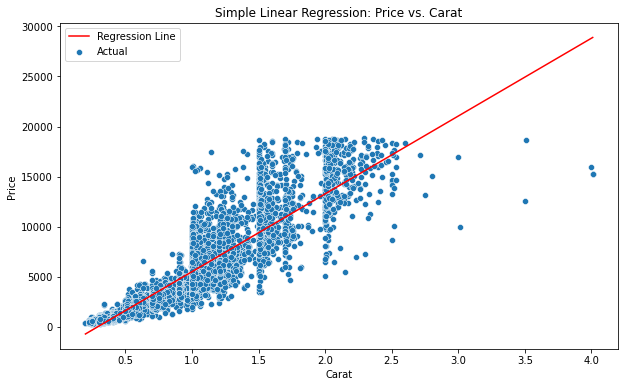

In [7]:
# Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
# R-squared score.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds").dropna()

# Selecting features (independent variable) and target (dependent variable)
X = diamonds[["carat"]]  # Simple linear regression with one predictor
y = diamonds["price"]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

# Predict values and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for 'carat': {coefficient:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualizing the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["carat"], y=y_test, label="Actual")
sns.lineplot(x=X_test["carat"], y=y_pred, color="red", label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs. Carat")
plt.legend()
plt.show()


Intercept: 0.93
Coefficient for 'total_bill': 0.11
R-squared Score: 0.5449


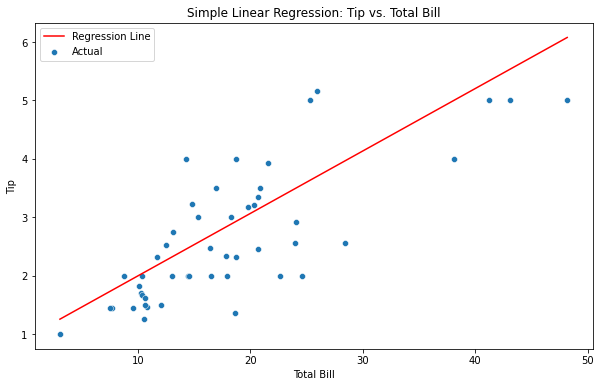

In [8]:
# Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
# simple linear regression and visualizes the results.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Selecting features and target variable
X = tips[["total_bill"]]  # Independent variable
y = tips["tip"]  # Dependent variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

# Predict values and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for 'total_bill': {coefficient:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualizing the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["total_bill"], y=y_test, label="Actual")
sns.lineplot(x=X_test["total_bill"], y=y_pred, color="red", label="Regression Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Simple Linear Regression: Tip vs. Total Bill")
plt.legend()
plt.show()


Intercept: 0.48
Coefficient: 2.39


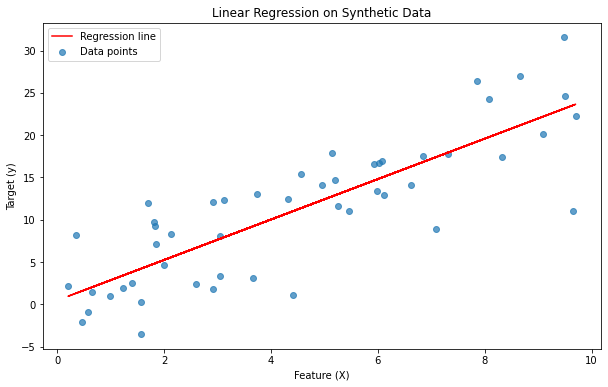

In [9]:
#  Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
# model to predict new values and plot the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)  # Ensuring reproducibility
X = np.random.rand(50, 1) * 10  # Feature (random values between 0 and 10)
y = 2.5 * X + np.random.randn(50, 1) * 5  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
X_new = np.array([[0], [5], [10]])  # New values for prediction
y_pred = model.predict(X_new)

# Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# Plot the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X, model.predict(X), color="red", label="Regression line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


In [10]:
# Write a Python script that pickles a trained linear regression model and saves it to a file.
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Selecting features and target variable
X = tips[["total_bill"]]  # Independent variable
y = tips["tip"]  # Dependent variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model using pickle
model_filename = "linear_regression_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved successfully to '{model_filename}'")



Model saved successfully to 'linear_regression_model.pkl'


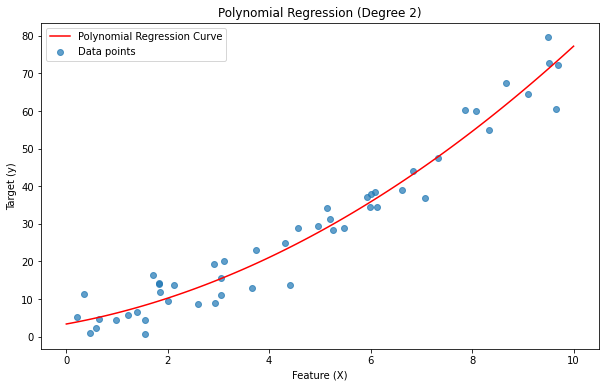

In [11]:
#Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
# regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(50, 1) * 10  # Feature values between 0 and 10
y = 3 + 2.5 * X + 0.5 * X**2 + np.random.randn(50, 1) * 5  # Quadratic relationship with noise

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for visualization
X_range = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth curve
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X_range, y_pred, color="red", label="Polynomial Regression Curve")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


Intercept: 3.48
Coefficient: 2.39


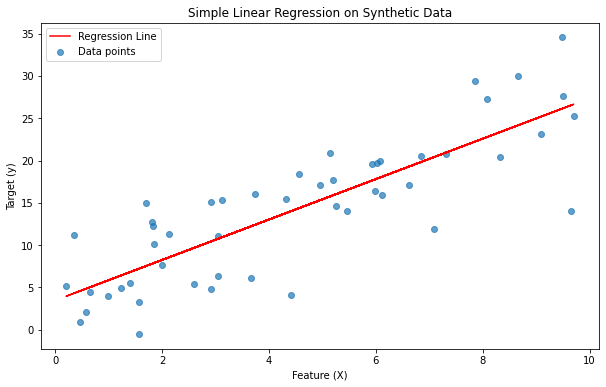

In [12]:
# Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
# regression model to the data. Print the model's coefficient and intercept.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)  # Ensuring reproducibility
X = np.random.rand(50, 1) * 10  # Random values between 0 and 10
y = 3 + 2.5 * X + np.random.randn(50, 1) * 5  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# Plot the synthetic data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Simple Linear Regression on Synthetic Data")
plt.legend()
plt.show()


Polynomial Degree 1: MSE = 32.95
Polynomial Degree 2: MSE = 15.90
Polynomial Degree 3: MSE = 16.05
Polynomial Degree 4: MSE = 17.23
Polynomial Degree 5: MSE = 17.15


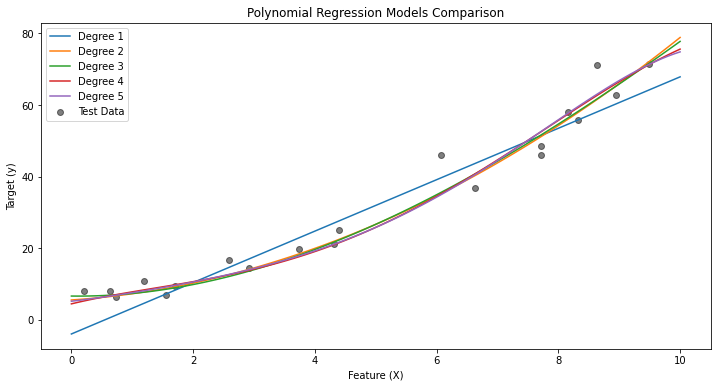

In [13]:
# Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
# compares their performance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 3 + 2.5 * X + 0.5 * X**2 + np.random.randn(100, 1) * 5  # Quadratic relationship with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degrees to test
degrees = [1, 2, 3, 4, 5]
mse_results = {}

# Fit and evaluate models for different polynomial degrees
plt.figure(figsize=(12, 6))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[degree] = mse
    
    # Plot regression curves
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    
    plt.plot(X_range, y_range_pred, label=f"Degree {degree}")

# Print MSE results
for degree, mse in mse_results.items():
    print(f"Polynomial Degree {degree}: MSE = {mse:.2f}")

# Visualization
plt.scatter(X_test, y_test, color="black", label="Test Data", alpha=0.5)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression Models Comparison")
plt.legend()
plt.show()


In [14]:
# Write a Python script that fits a simple linear regression model with two features and prints the model's
# coefficients, intercept, and R-squared score.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Selecting two features and the target variable
X = tips[["total_bill", "size"]]  # Independent variables
y = tips["tip"]  # Dependent variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Predict values and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Intercept: {intercept:.2f}")
print(f"Coefficients: {list(zip(X.columns, coefficients))}")
print(f"R-squared Score: {r2:.4f}")


Intercept: 0.57
Coefficients: [('total_bill', 0.0908811678149542), ('size', 0.2650175437880634)]
R-squared Score: 0.4811


Intercept: 3.48
Coefficient: 2.39


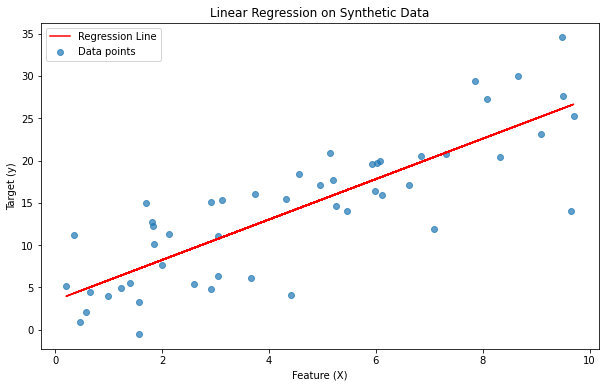

In [15]:
# Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
# regression line along with the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)  # Ensuring reproducibility
X = np.random.rand(50, 1) * 10  # Random values between 0 and 10
y = 3 + 2.5 * X + np.random.randn(50, 1) * 5  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# Plot the synthetic data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


In [16]:
#  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
# with multiple features.
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting numerical features
X = diamonds[["carat", "depth", "table"]]  # You can add more features as needed

# Adding a constant for VIF computation
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)


  Feature          VIF
0   const  3539.323665
1   carat     1.042039
2   depth     1.104275
3   table     1.141032


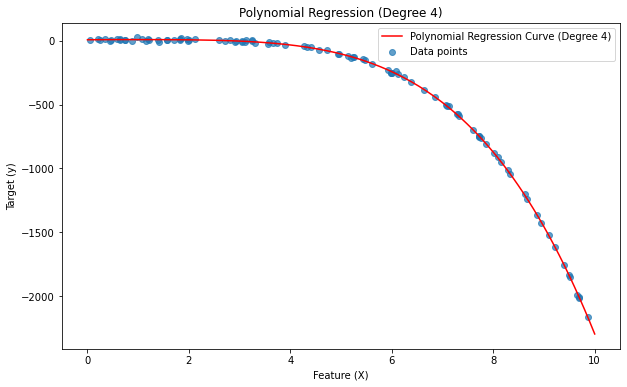

In [17]:
# Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
# polynomial regression model, and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 3 + 2.5 * X - 1.2 * X**2 + 0.8 * X**3 - 0.3 * X**4 + np.random.randn(100, 1) * 8  # Degree 4 polynomial relationship with noise

# Transform features to polynomial (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for visualization
X_range = np.linspace(0, 10, 200).reshape(-1, 1)  # Smooth curve
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X_range, y_pred, color="red", label="Polynomial Regression Curve (Degree 4)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


In [18]:
#  Write a Python script that creates a machine learning pipeline with data standardization and a multiple
# linear regression model, and prints the R-squared score.
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds").dropna()

# Selecting multiple features and target variable
X = diamonds[["carat", "depth", "table"]]  # Independent variables
y = diamonds["price"]  # Dependent variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with data standardization and multiple linear regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardizes the features
    ("regressor", LinearRegression())  # Fits the linear regression model
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.8532


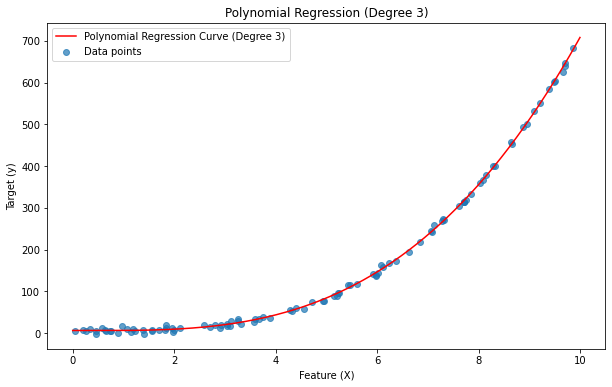

In [19]:
# Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
# regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 3 + 2.5 * X - 1.2 * X**2 + 0.8 * X**3 + np.random.randn(100, 1) * 5  # Degree 3 polynomial relationship with noise

# Transform features to polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for visualization
X_range = np.linspace(0, 10, 200).reshape(-1, 1)  # Smooth curve
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X_range, y_pred, color="red", label="Polynomial Regression Curve (Degree 3)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 3)")
plt.legend()
plt.show()


In [20]:
# Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
# he R-squared score and model coefficients.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features (random values between 0 and 10)
true_coefficients = np.array([3.2, -1.5, 2.0, 0.5, -2.3])  # True coefficients for features
y = X @ true_coefficients + np.random.randn(100) * 5  # Linear relationship with noise

# Convert to DataFrame for clarity
feature_names = [f"Feature_{i+1}" for i in range(5)]
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name="Target")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


R-squared Score: 0.8265
Model Coefficients:
Feature_1: 3.03
Feature_2: -1.62
Feature_3: 2.32
Feature_4: 0.57
Feature_5: -2.52
Intercept: 0.73


Intercept: 3.48
Coefficient: 2.39


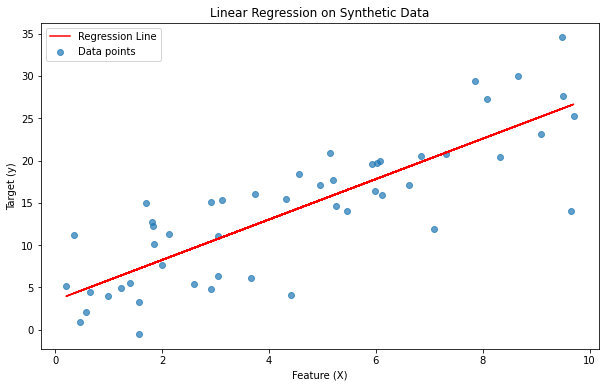

In [21]:
#  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
# data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)  # Ensuring reproducibility
X = np.random.rand(50, 1) * 10  # Random values between 0 and 10
y = 3 + 2.5 * X + np.random.randn(50, 1) * 5  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# Plot the synthetic data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", alpha=0.7)
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


In [22]:
# Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 100 samples, 3 features (random values between 0 and 10)
true_coefficients = np.array([2.5, -1.8, 3.0])  # True coefficients for features
y = X @ true_coefficients + np.random.randn(100) * 5  # Linear relationship with noise

# Convert to DataFrame for clarity
feature_names = [f"Feature_{i+1}" for i in range(3)]
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name="Target")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


R-squared Score: 0.7355
Model Coefficients:
Feature_1: 2.55
Feature_2: -1.84
Feature_3: 3.34
Intercept: -0.43


In [23]:
# Write a Python script that demonstrates how to serialize and deserialize machine learning models using
# joblib instead of pickling.
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 3 + 2.5 * X + np.random.randn(100, 1) * 5  # Linear relationship with noise

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model using joblib
model_filename = "linear_regression_model.joblib"
joblib.dump(model, model_filename)
print(f"Model saved successfully to '{model_filename}'")

# Load the model from file
loaded_model = joblib.load(model_filename)

# Example prediction using the loaded model
X_new = np.array([[5]])  # Predicting for X = 5
predicted_y = loaded_model.predict(X_new)
print(f"Predicted value for X=5: {predicted_y[0][0]:.2f}")


Model saved successfully to 'linear_regression_model.joblib'
Predicted value for X=5: 15.21


In [24]:
# Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
# the Seaborn 'tips' dataset.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Selecting numerical and categorical features
X = tips[["total_bill", "size", "sex", "smoker", "day", "time"]]  # Independent variables
y = tips["tip"]  # Dependent variable

# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print model coefficients and performance
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


R-squared Score: 0.4373
Model Coefficients:
total_bill: 0.09
size: 0.23
sex_Female: -0.03
smoker_No: 0.19
day_Fri: 0.18
day_Sat: -0.01
day_Sun: 0.13
time_Dinner: -0.09
Intercept: 0.48


In [25]:
# Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
true_coefficients = np.array([3.2, -1.5, 2.0, 0.5, -2.3])  # True coefficients
y = X @ true_coefficients + np.random.randn(100) * 5  # Linear relationship with noise

# Convert to DataFrame for clarity
feature_names = [f"Feature_{i+1}" for i in range(5)]
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name="Target")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Regularization strength

# Train models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared scores
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Linear Regression R-squared Score: {r2_linear:.4f}")
print(f"Ridge Regression R-squared Score: {r2_ridge:.4f}")

print("\nLinear Regression Coefficients:")
for feature, coef in zip(feature_names, linear_model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nRidge Regression Coefficients:")
for feature, coef in zip(feature_names, ridge_model.coef_):
    print(f"{feature}: {coef:.2f}")


Linear Regression R-squared Score: 0.8265
Ridge Regression R-squared Score: 0.8266

Linear Regression Coefficients:
Feature_1: 3.03
Feature_2: -1.62
Feature_3: 2.32
Feature_4: 0.57
Feature_5: -2.52

Ridge Regression Coefficients:
Feature_1: 3.02
Feature_2: -1.61
Feature_3: 2.32
Feature_4: 0.57
Feature_5: -2.52


In [26]:
# Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
# dataset.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
true_coefficients = np.array([3.2, -1.5, 2.0, 0.5, -2.3])  # True coefficients
y = X @ true_coefficients + np.random.randn(100) * 5  # Linear relationship with noise

# Convert to DataFrame for clarity
feature_names = [f"Feature_{i+1}" for i in range(5)]
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.Series(y, name="Target")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Perform cross-validation (using 5 folds)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print Cross-validation results
print(f"Cross-validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared Score: {cv_scores.mean():.4f}")


Cross-validation R-squared Scores: [0.85658256 0.72931099 0.88195043 0.89584955 0.81771838]
Mean R-squared Score: 0.8363


R-squared Scores for Different Polynomial Degrees:
Degree 1: R-squared = 0.8633
Degree 2: R-squared = 0.9944
Degree 3: R-squared = 0.9996
Degree 4: R-squared = 0.9995
Degree 5: R-squared = 0.9995


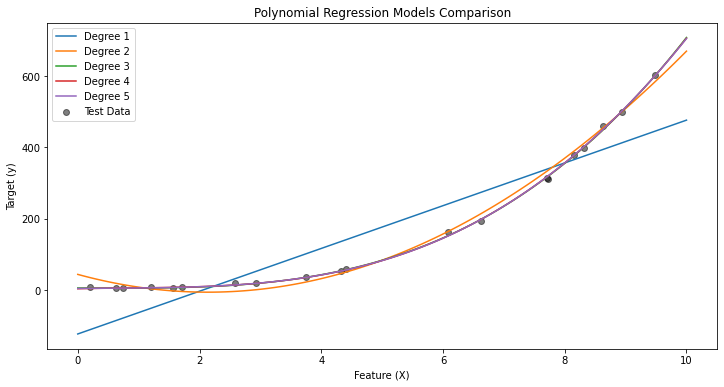

In [27]:
# Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 3 + 2.5 * X - 1.2 * X**2 + 0.8 * X**3 + np.random.randn(100, 1) * 5  # Polynomial relationship with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degrees to test
degrees = [1, 2, 3, 4, 5]
r2_results = {}

# Fit and evaluate models for different polynomial degrees
plt.figure(figsize=(12, 6))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    r2_results[degree] = r2
    
    # Plot regression curves
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    
    plt.plot(X_range, y_range_pred, label=f"Degree {degree}")

# Print R-squared scores
print("R-squared Scores for Different Polynomial Degrees:")
for degree, r2 in r2_results.items():
    print(f"Degree {degree}: R-squared = {r2:.4f}")

# Visualization
plt.scatter(X_test, y_test, color="black", label="Test Data", alpha=0.5)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression Models Comparison")
plt.legend()
plt.show()


--- The End ---